Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv('Occupancy_Estimation.csv')

# Drop non-numeric columns
df = df.drop(columns=['Date', 'Time'])

print(df.columns)


Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')


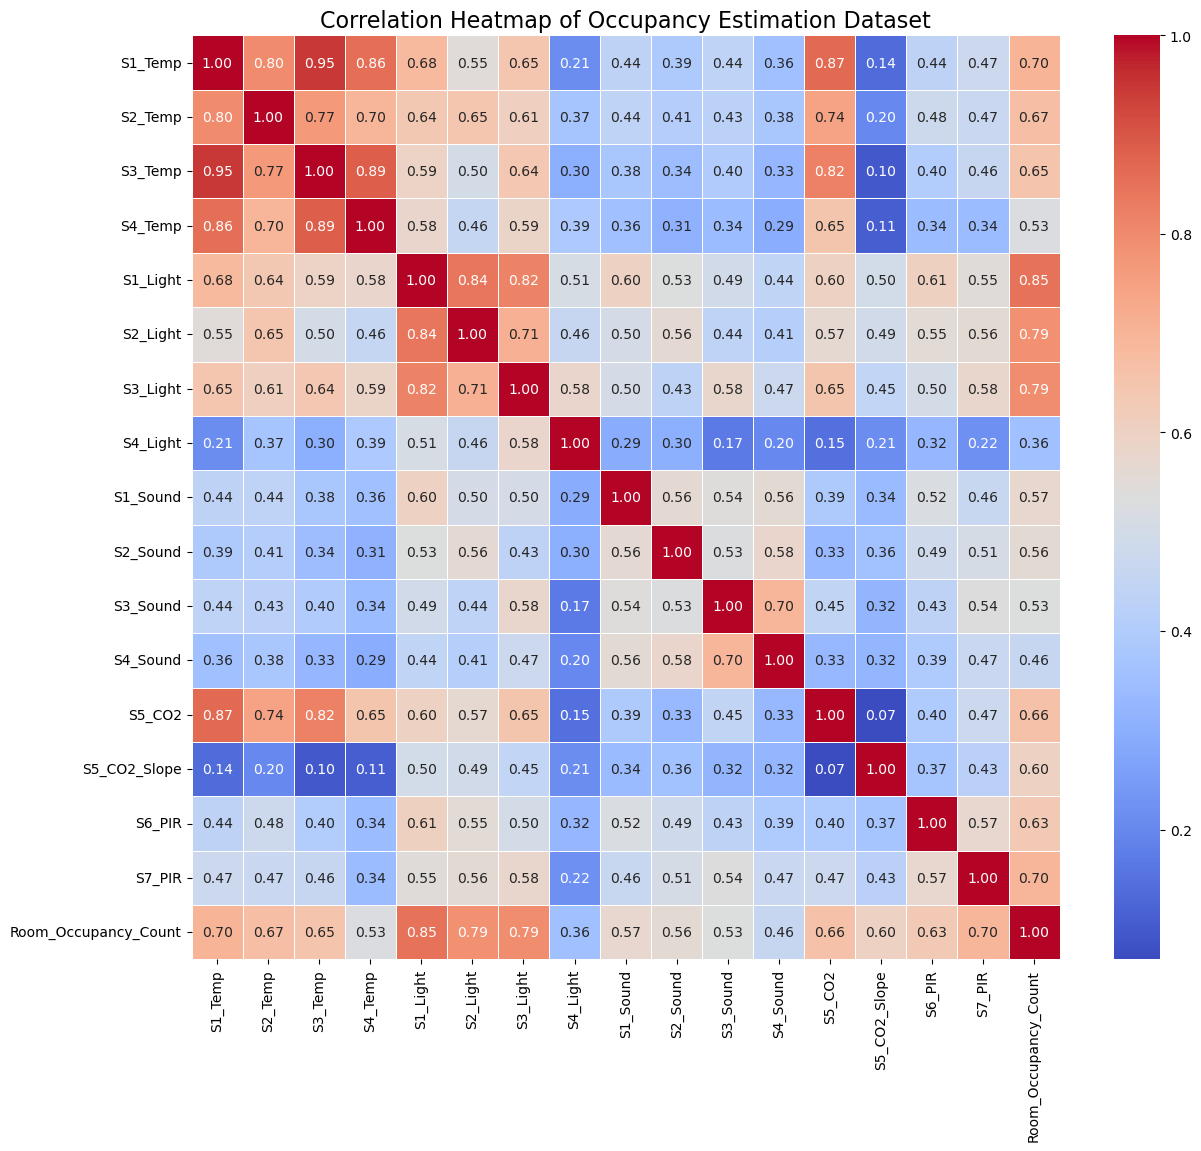

In [32]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap of Occupancy Estimation Dataset', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [33]:
# Get the correlation values with the target label
target_corr = corr_matrix['Room_Occupancy_Count'].drop('Room_Occupancy_Count')

# Get the top 5 correlated features
top_5_corr = target_corr.abs().sort_values(ascending=False).head(5)
print(top_5_corr)

S1_Light    0.849058
S3_Light    0.793081
S2_Light    0.788764
S1_Temp     0.700868
S7_PIR      0.695138
Name: Room_Occupancy_Count, dtype: float64


The target label is "Room_Occupancy_Count". The top 5 correlated frequencies are S1_Light, S3_Light, S2_Light, S1_Temp, and S7_PIR. 

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [34]:
# Split the data into features and labels
X = data.drop(columns='Room_Occupancy_Count')
y = data['Room_Occupancy_Count']

# Split the data into training (90%) and test (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [35]:
# Create a pipeline with StandardScaler and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [36]:
# Define the parameter grid
param_grid = {'knn__n_neighbors': range(1, 31)}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'knn__n_neighbors': 3}


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

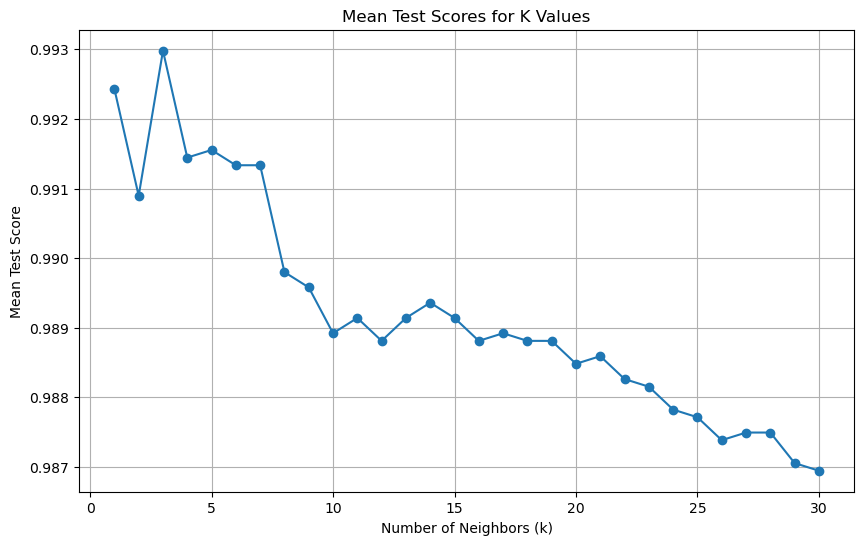

In [37]:
# Get the mean test scores from the grid search results
mean_test_scores = grid_search.cv_results_['mean_test_score']
param_k = grid_search.cv_results_['param_knn__n_neighbors']

# Plot the mean test scores
plt.figure(figsize=(10, 6))
plt.plot(param_k, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Scores for K Values')
plt.grid(True)
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       0.98      1.00      0.99        58
           2       0.98      0.95      0.96        83
           3       0.93      0.99      0.96        69

    accuracy                           0.99      1013
   macro avg       0.97      0.98      0.98      1013
weighted avg       0.99      0.99      0.99      1013

[[800   0   1   2]
 [  0  58   0   0]
 [  0   1  79   3]
 [  0   0   1  68]]


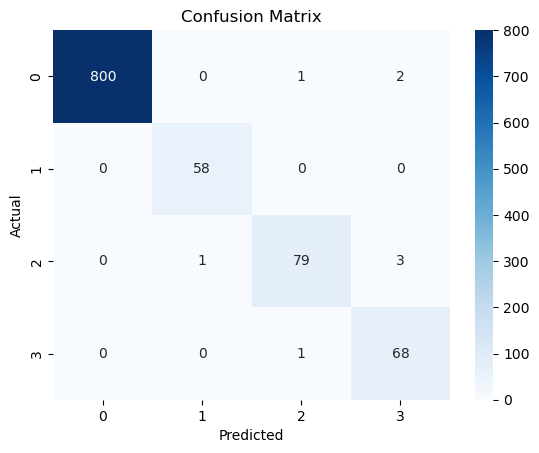

In [41]:
# Predict on the test set
y_pred = grid_search.predict(X_test)

# Generate classification report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Optionally, visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()